# Домашнее задание

1. К алгоритму kNN, реализованному на уроке, реализовать добавление весов для соседей по любому из показанных на уроке принципов.


2. *Написать функцию подсчета метрики качества кластеризации как среднее квадратичное внутрикластерное расстояние и построить график ее зависимости от количества кластеров k (взять от 1 до 10) для выборки данных из данного урока (создать датасет, как в методичке).

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

RANDOM_STATE = 52
N_SAMPLES = 300

In [2]:
def e_metrics(x1, x2):
    
    distance = np.sum(np.square(x1 - x2))

    return np.sqrt(distance)

In [3]:
def weight(distance):
    return 1/(distance + 1)

In [4]:
def make_weights(k, distances):
#     print(f'{k},\n{distances}')
    w = np.zeros(k) # w = веса для класса в подборке distances. w[0] это вес класса 0 среди подобранных k соседей
    for i in range(k):
#         print(distances[i][0], '<<')
        w[distances[i][1]] += weight(distances[i][0])
    return w

In [5]:
def knn(x_train, y_train, x_test, k):
    
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        
        # записываю в answers максимальное значение веса по индексу
        # индекс = класс, где веса больше, тот и прав
        answers.append(make_weights(k, sorted(test_distances)[0:k]).argmax())
        
    return answers

In [6]:
def accuracy(pred, y):
    return (sum(pred == y) / len(y))

In [7]:
def get_graph(X_train, y_train, k):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])

    h = .1

    # Расчет пределов графика
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    print(np.c_[xx.ravel(), yy.ravel()].shape)

    # Получим предсказания для всех точек
    Z = knn(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k)
    # Построим график
    Z = np.array(Z).reshape(xx.shape)
    plt.figure(figsize=(7,7))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')

    # Добавим на график обучающую выборку
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"Трехклассовая kNN классификация при k = {k}")
    plt.show()

In [8]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=N_SAMPLES, random_state=RANDOM_STATE)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=RANDOM_STATE,
                                                    stratify=y)
X_train.shape, X_test.shape

((240, 2), (60, 2))

In [10]:
import matplotlib.pyplot as plt
import numpy as np

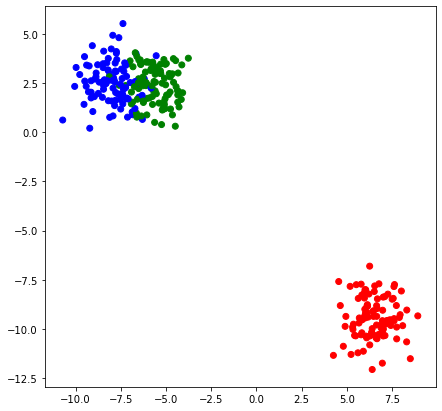

In [11]:
cmap = ListedColormap(['red', 'green', 'blue'])
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap);

In [12]:
# plt.figure(figsize=(7, 7))
# plt.scatter(X[:, 0], X[:, 1]);

In [13]:
# k = 1000
# distances = np.ones(k)
# make_weights(k, distances)

In [14]:
k = 10

y_pred = knn(X_train, y_train, X_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 10: 0.933


In [15]:
%%time
accuracy_list = []
accuracy_list.append(0)
accuracy_list.append(0)
for s in range(3, 20):    
    y_pred = knn(X_train, y_train, X_test, s)
    accuracy_list.append(accuracy(y_pred, y_test))
#     print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')
    

Wall time: 1.48 s


лучшее количество соседей для данной задачи: 5


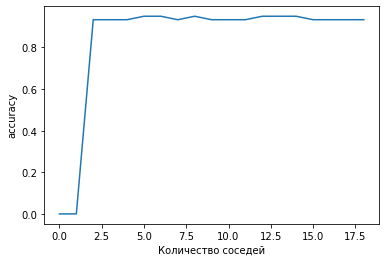

In [16]:
accuracy_list = np.array(accuracy_list)
print(f'лучшее количество соседей для данной задачи: {accuracy_list.argmax()}')
plt.xlabel('Количество соседей')
plt.ylabel('accuracy')
plt.plot(accuracy_list)
plt.show()

(41881, 2)


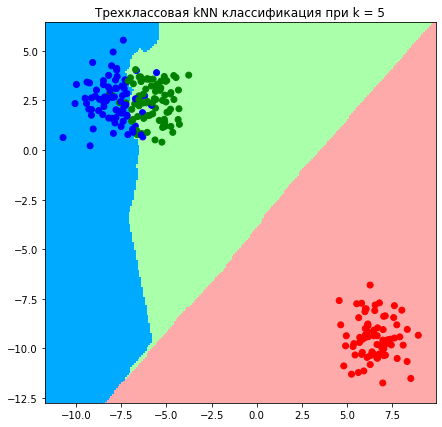

Wall time: 1min 1s


In [17]:
%%time
get_graph(X_train, y_train, accuracy_list.argmax())

In [18]:
#среднее квадратичное внутрикластерное расстояние

In [19]:
def e_metrics_kmeans(x1, x2):
    
    distance = np.sum(np.square(x1 - x2))
    
    return np.sqrt(distance)

In [20]:
def kmeans(data, k, max_iterations, min_distance):    
    # инициализируем центроиды как первые k элементов датасета
    centroids = [data[i] for i in range(k)]
    
    for _ in range(max_iterations):
        # Создадим словарь для кластеризации
        clusters = {i: [] for i in range(k)}
        
        # кластеризуем объекты по центроидам
        for x in data:
            # определим расстояния от объекта до каждого центроида
#             print(x, centroids)
            distances = [e_metrics_kmeans(x, centroid) for centroid in centroids]
            # отнесем объект к кластеру, до центроида которого наименьшее расстояние
            cluster = distances.index(min(distances))
            clusters[cluster].append(x)
        
        # сохраним предыдущие центроиды в отдельный список для последующего сравнения сновыми
        old_centroids = centroids.copy()
        
        # пересчитаем центроиды как среднее по кластерам
        for cluster in clusters:
            centroids[cluster] = np.mean(clusters[cluster], axis=0)
            
        # сравним величину смещения центроидов с минимальной
        optimal = True
        for centroid in range(len(centroids)):
            if np.linalg.norm(centroids[centroid] - old_centroids[centroid], ord=2) > min_distance:
                optimal = False
                break
        
        # если все смещения меньше минимального, останавливаем алгоритм  
        if optimal:
            break
    
    return old_centroids, clusters

In [21]:
def visualize(centroids, clusters):
    colors = ['r', 'g', 'b', 'orange', 'y']
    
    plt.figure(figsize=(7,7))
    
    # нанесем на график центроиды
    for centroid in centroids:
        plt.scatter(centroid[0], centroid[1], marker='x', s=130, c='black')
        
    # нанесем объекты раскрашенные по классам
    for cluster_item in clusters:
        for x in clusters[cluster_item]:
            plt.scatter(x[0], x[1], color=colors[cluster_item])
            
    plt.show()

In [22]:
# определим максимальное количество итераций
max_iterations = 100

# и минимальное расстояние между центроидами до пересчета и после него, при котором нужно остановить алгоритм
min_distance = 1e-4

# сразу определим известное нам количество кластеров
k = 3

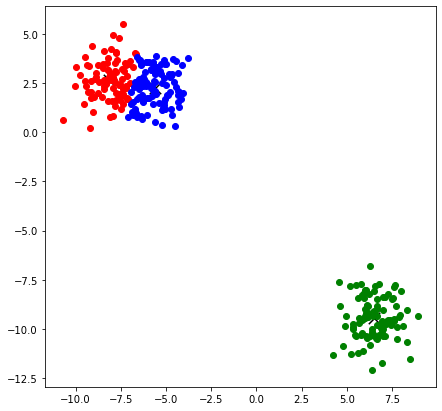

Wall time: 1.74 s


In [23]:
%%time
centroids, clusters = kmeans(X, k, max_iterations, min_distance)

visualize(centroids, clusters)

In [24]:
centroids

[array([-8.13728431,  2.66532187]),
 array([ 6.50851386, -9.44966244]),
 array([-5.63473859,  2.27214896])]

In [25]:

def elbow_point(X, k, max_iterations, min_distance):
    distance_change = []
    for i in range(1, k):
        centroids, clusters = kmeans(X, i, max_iterations, min_distance)
        distance = []
        for each in clusters:
            x1 = clusters.get(each)
            x2 = centroids[each]
            distance.append(np.sum(np.square(x1 - x2)))
#             print(np.sum(np.square(x1 - x2)))
        distance_change.append(np.sum(distance))
#         print(distance_change, distance)
    return distance_change

In [26]:
k = 10
max_iterations = 100
min_distance = 1e-4

In [27]:
distance_change = elbow_point(X, k, max_iterations, min_distance)

In [28]:
distance_change = np.sqrt(distance_change)
distance_change

array([148.77256554,  28.80270534,  22.57281548,  20.92137128,
        19.23986735,  17.61070554,  16.3248488 ,  15.72086699,
        15.22375009])

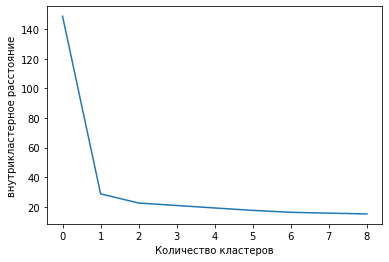

In [29]:
distance_change = np.array(distance_change)
# print(f'лучшее количество кластеров для данной задачи: {accuracy_list.argmax()}')
plt.xlabel('Количество кластеров')
plt.ylabel('внутрикластерное расстояние')
plt.plot(distance_change)
plt.show()

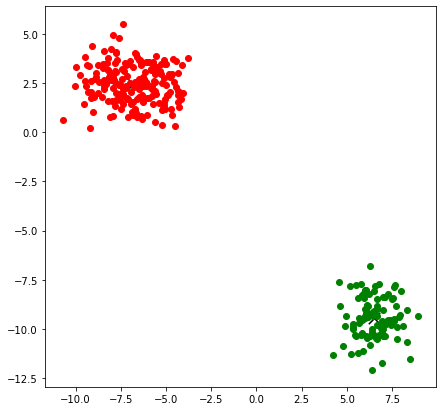

Wall time: 1.71 s


In [30]:
%%time
max_iterations = 100
min_distance = 1e-4
k = 2
centroids, clusters = kmeans(X, k, max_iterations, min_distance)

visualize(centroids, clusters)